# <a id="0"></a> Contents
1. [Importing Modules and Reading the Dataset](#1)
1. [Adding the Word Counts to the Dataframe and Finding out How Many Times Some Words Were Used ](#2)
1. [Finding the Most-Sold Pruduct Class](#3)
1. [Building a Sentiment Classifier](#4)
   1. [Logistic Regression ](#5)
   1. [Naive Bayes](#6)
   1. [Support Vector Machine (SVM)](#7)
   1. [Neural Network](#8)
1. [Evaluating Models](#9) 
   1. [Adding Results to the Dataframe](#10)
   1. [ROC Curves and AUC](#11)
1. [Conclusion](#12) 

<img src="https://o.aolcdn.com/images/dims3/GLOB/crop/3481x1741+215+412/resize/630x315!/format/jpg/quality/85/http%3A%2F%2Fo.aolcdn.com%2Fhss%2Fstorage%2Fmidas%2F6a9e5dd26a5d23711860a4a67b8fc971%2F204872692%2Fljnqxfyn7am-shanna-camilleri.jpg", height="10" width="700", title="source: imgur.com"/>

# <a id="1"></a> Importing Modules and Reading the Dataset

In [48]:
!pip install WordCloud
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [49]:
# Reading Data 
df1 = pd.read_csv('C:/Users/Nancy/Downloads/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df = df1[['Review Text','Rating','Class Name','Age']]
#df.info()
#df.describe()
df.head()

,Review Text,Rating,Class Name,Age
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34
2,I had such high hopes for this dress and reall...,3,Dresses,60
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50
4,This shirt is very flattering to all due to th...,5,Blouses,47


# <a id="2"></a> Adding the Word Counts to the Dataframe and Finding out How Many Times Some Words Were Used 


In [50]:
#set(df['Review Tex'])
df['Review Text'] = df['Review Text'].fillna('')
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

def WordCounts(s):
    c = {}
    if analyzer(s):
        d = {}
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k
        for index,i in enumerate(w[0]):
            c[d[index]] = i
    return  c

df['Word Counts'] = df['Review Text'].apply(WordCounts)
df.head()

C:\Users\Nancy\AnacondaNew\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Nancy\AnacondaNew\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Review Text,Rating,Class Name,Age,Word Counts
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,I had such high hopes for this dress and reall...,3,Dresses,60,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


love     8951
great    6117
super    1726
happy     705
glad      614
dtype: int64


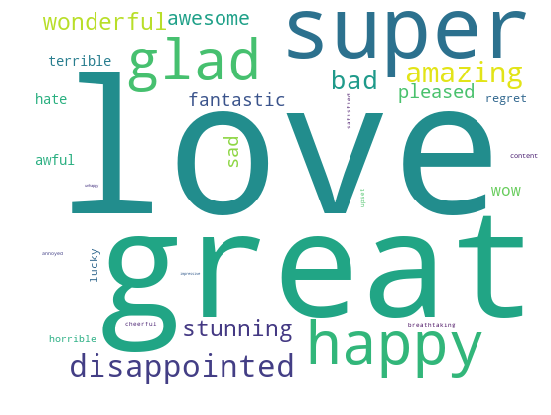

In [51]:
SelectedWords = ['awesome','great','fantastic','extraordinary','amazing','super','magnificent',
                 'stunning','impressive','wonderful','breathtaking','love','content','pleased',
                 'happy','glad','satisfied','lucky','shocking','cheerful','wow','sad','unhappy',
                 'horrible','regret','bad','terrible','annoyed','disappointed','upset','awful',
                 'hate']

def SelectedCount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = df.copy()  
for word in SelectedWords:
    dfwc[word] = dfwc['Word Counts'].apply(SelectedCount,args=(word,))
    
word_sum = dfwc[SelectedWords].sum() 
print(word_sum.sort_values(ascending=False).iloc[:5])

plt.subplots(figsize=(14,7))
wc = WordCloud(background_color='white',
                      width=512,
                      height=384 ).generate_from_frequencies(word_sum)
plt.imshow(wc)
plt.axis('off')
plt.savefig('graph1.png')
plt.show()

# <a id="3"></a>  Finding the Most-Sold Pruduct Class

Dresses     6319
Knits       4843
Blouses     3097
Sweaters    1428
Pants       1388
Name: Class Name, dtype: int64


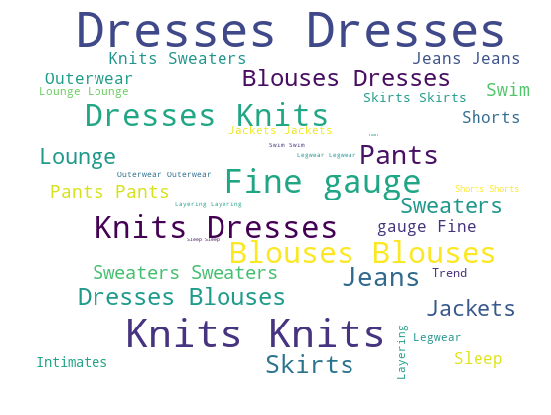

In [52]:
print(df['Class Name'].value_counts().iloc[:5])

cn = df['Class Name']
plt.subplots(figsize=(14,7))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384 
                     ).generate(" ".join(str(c) for c in cn))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph2.png')
plt.show()

 # <a id="4"></a> Building a Sentiment Classifier


In [53]:
df1=df['Rating'].value_counts().to_frame()
avgdf1 = df.groupby('Class Name').agg({'Rating': np.average})
avgdf2 = df.groupby('Class Name').agg({'Age': np.average})
avgdf3 = df.groupby('Rating').agg({'Age': np.average})

trace1 = go.Bar(
    x=avgdf1.index,
    y=round(avgdf1['Rating'],2),
    marker=dict(
        color=avgdf1['Rating'],
        colorscale = 'RdBu')
)

trace2 = go.Bar(
    x=df1.index,
    y=df1.Rating,
    marker=dict(
        color=df1['Rating'],
        colorscale = 'RdBu')
)

trace3 = go.Bar(
    x=avgdf2.index,
    y=round(avgdf2['Age'],2),
    marker=dict(
        color=avgdf2['Age'],
        colorscale = 'RdBu')
)

trace4 = go.Bar(
    x=avgdf3.index,
    y=round(avgdf3['Age'],2),
    marker=dict(
        color=avgdf3['Age'],
        colorscale = 'Reds')
)

fig = tools.make_subplots(rows=2, cols=2)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout']['xaxis1'].update(title='Class')
fig['layout']['yaxis1'].update(title='Average Rating')
fig['layout']['xaxis2'].update(title='Rating')
fig['layout']['yaxis2'].update(title='Count')
fig['layout']['xaxis3'].update(title='Class')
fig['layout']['yaxis3'].update(title='Average Age of the Reviewers')
fig['layout']['xaxis4'].update(title='Rating')
fig['layout']['yaxis4'].update(title='Average Age of the Reviewers')

fig['layout'].update(height=800, width=900,showlegend=False)
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



In [54]:
cv = df['Class Name'].value_counts()

trace = go.Scatter3d( x = avgdf1.index,
                      y = avgdf1['Rating'],
                      z = cv,
                      mode = 'markers',
                      marker = dict(size=10,color=avgdf1['Rating']),
                      hoverinfo ="text",
                      text="Class: "+avgdf1.index+" \ Average Rating: "+round(avgdf1['Rating'],2).apply(str)+" \ Number of Sales: "+cv.apply(str)
                      )

data = [trace]
layout = go.Layout(title="Average Rating & Class & Number of Sales",
                   scene = dict(
                    xaxis = dict(title='Class'),
                    yaxis = dict(title='Average Rating'),
                    zaxis = dict(title='Number of Sales'),),
                   margin = dict(l=30, r=30, b=30, t=30))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
plt.savefig('3D_Scatter.png')

In [55]:
# Rating of 4 or higher -> positive, while the ones with 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >=4
df.head()

,Review Text,Rating,Class Name,Age,Word Counts,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
5,"I love tracy reese dresses, but this one is no...",2,Dresses,49,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False


In [56]:
# splitting data
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
X = vectorizer.fit_transform(train_data['Review Text'])
y = train_data['Sentiment']

C:\Users\Nancy\AnacondaNew\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



## <a id="5"></a> Logistic Regression


In [57]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## <a id="6"></a> Naive Bayes

In [58]:
nb = MultinomialNB()
nb.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## <a id="7"></a> Support Vector Machine (SVM)

In [59]:
svm = SVC()
svm.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## <a id="8"></a> Neural Network

In [60]:
nn = MLPClassifier()
nn.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# <a id="9"></a> Evaluating Models

## <a id="10"></a> Adding Results to the Dataframe


The results show the probabilies obtained by the used models. If the probability is bigger than 0.5, it means that the *Sentiment * is ***True (Positive)***; if not, the *Sentiment* is ***False (negative)***.

In [61]:
df1=pd.DataFrame({'Logistic Regression':lr.predict_proba(X)[:,1], 'Naive Bayes':nb.predict_proba(X)[:,1],
                  'SVM':svm.decision_function(X),'Neural Network':nn.predict_proba(X)[:,1]})
df['Logistic Regression']=round(df1['Logistic Regression'],2)
df['Naive Bayes']=round(df1['Naive Bayes'],2)
df['Neural Network']=round(df1['Neural Network'],2)
df.head()

,Review Text,Rating,Class Name,Age,Word Counts,Sentiment,Logistic Regression,Naive Bayes,Neural Network
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True,0.95,0.97,1.0
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True,0.96,0.99,1.0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True,0.83,0.79,1.0
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True,1.00,1.00,1.0
5,"I love tracy reese dresses, but this one is no...",2,Dresses,49,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False,0.93,0.02,1.0


## <a id="11"></a> ROC Curves and AUC


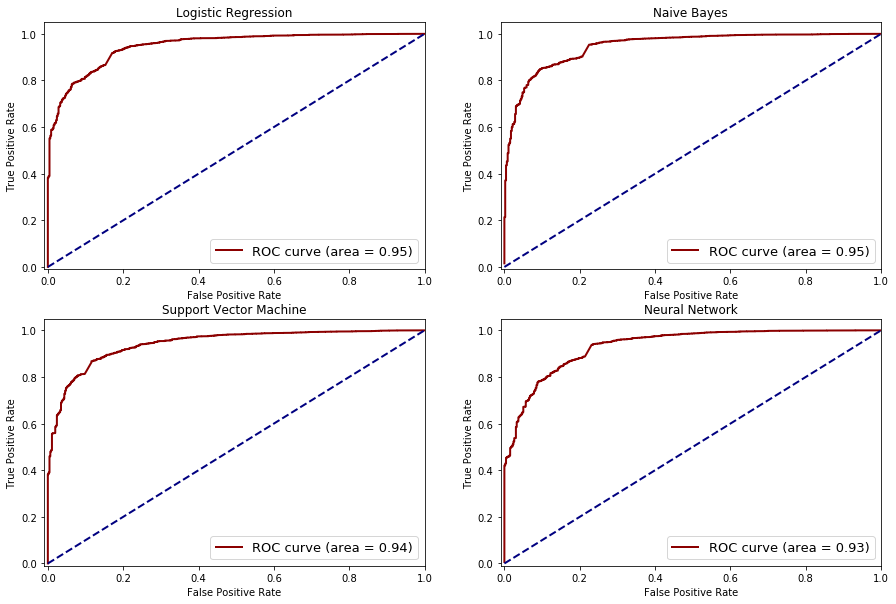

In [62]:
pred_lr = lr.predict_proba(vectorizer.transform(test_data['Review Text']))[:,1]
fpr_lr,tpr_lr,_ = roc_curve(test_data['Sentiment'].values,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(vectorizer.transform(test_data['Review Text']))[:,1]
fpr_nb,tpr_nb,_ = roc_curve(test_data['Sentiment'].values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_svm = svm.decision_function(vectorizer.transform(test_data['Review Text']))
fpr_svm,tpr_svm,_ = roc_curve(test_data['Sentiment'].values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

pred_nn = nn.predict_proba(vectorizer.transform(test_data['Review Text']))[:,1]
fpr_nn,tpr_nn,_ = roc_curve(test_data['Sentiment'].values,pred_nn)
roc_auc_nn = auc(fpr_nn,tpr_nn)

f, axes = plt.subplots(2, 2,figsize=(15,10))
axes[0,0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0,0].legend(loc='lower right', fontsize=13)

axes[0,1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[0,1].legend(loc='lower right', fontsize=13)

axes[1,0].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Support Vector Machine')
axes[1,0].legend(loc='lower right', fontsize=13)

axes[1,1].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nn))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Neural Network')
axes[1,1].legend(loc='lower right', fontsize=13)

# <a id="12"></a> Conclusion


When we look at the  **AUC values**, **Naive Bayes** and **Logistic Regression** gives the best results.  Thus, both of them are very effective at predicting sentiment.